<a href="https://colab.research.google.com/github/sanvasu/Credit-EDA-Credit-Score-Calculation-with-Python/blob/main/EDA_Credit_Score_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import re

## Reading the data

In [130]:
df= pd.read_csv("Credit_score.csv")
df.head(10)

<ipython-input-130-ff7a49622291>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Credit_score.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.43017233,!@9#%8,340.4792118
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674,Low_spent_Small_value_payments,244.5653167
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.78521651,High_spent_Medium_value_payments,358.1241676
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.6906269
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123783,High_spent_Large_value_payments,484.5912143


## Exploratory Data Analysis

### Preview data

In [131]:
df.shape

(100000, 27)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**Observations :**
- There are missing values present in dataset.
- Dataset has both numerical and string values.
- Datatypes are not correctly assigned

In [133]:
#Check statistical values for fields with numerical datatype

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.63333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.00000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.00000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.00000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.00000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.00000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.00000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.00000


In [134]:
#Check statistical values for fields with other than numerical datatype

df.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


**Observations**

- Customer_ID has 12500 unique values. It means we have data of 12500 customers.
- Month has only 8 unique values. Better to analyse further which months are present.
- Age has 1788 unique values. This looks strange as general age range is from 0-100.
- SSN has 12501 unique values, whereas Customer_ID only has only 12500 unique values. There is a possibility that incorrect SSN value is entered for one of the customer as same person can't have multiple SSN.
  - We can see the there the most occuring SSN looks like a garabge value
- The dataset needs data cleaning as we can see the there are underscores present in few of the columns

In [135]:
# Checking number of empty values in each column
df.isna().sum()/len(df)*100

,0
ID,0.000
Customer_ID,0.000
Month,0.000
Name,9.985
Age,0.000
SSN,0.000
Occupation,0.000
Annual_Income,0.000
Monthly_Inhand_Salary,15.002
Num_Bank_Accounts,0.000


## Filling missing null values

In [136]:
df['Name'].fillna('Unknown',inplace=True)
df['Monthly_Inhand_Salary'].fillna(0,inplace=True)
df['Type_of_Loan'].fillna('Not Specified',inplace=True)
df['Num_Credit_Inquiries'].fillna(0,inplace=True)
df['Amount_invested_monthly'].fillna(0,inplace=True)
df['Num_of_Delayed_Payment'].fillna(0,inplace=True)
df['Monthly_Balance'].fillna(0,inplace=True)
df['Credit_Mix'].replace('_','NA',inplace=True)
df['Amount_invested_monthly'].replace('_','',inplace=True)
df['Credit_History_Age'].fillna('0 Years and 0 Months',inplace=True)

##Replacing special characters

In [137]:
replacing_columns = df[['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']]
replacing_columns.replace('-', '', regex=True,inplace=True)
replacing_columns.replace('_', '', regex=True,inplace=True)
df[['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']] = replacing_columns

<ipython-input-137-d526669641d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacing_columns.replace('-', '', regex=True,inplace=True)
<ipython-input-137-d526669641d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacing_columns.replace('_', '', regex=True,inplace=True)


In [138]:
df.isna().sum()*100/len(df)

,0
ID,0.0
Customer_ID,0.0
Month,0.0
Name,0.0
Age,0.0
SSN,0.0
Occupation,0.0
Annual_Income,0.0
Monthly_Inhand_Salary,0.0
Num_Bank_Accounts,0.0


In [139]:
def get_mode(series):
    return series.mode().iloc[0]

##Filling missing values using Mode of the column

In [140]:
df['Age'] = df.groupby('Customer_ID')['Age'].transform(get_mode)
df['Num_Bank_Accounts'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(get_mode)
df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].transform(get_mode)
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(get_mode)

##Filling missing values using Max of the column

In [141]:
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.replace(0, x.max()))

In [107]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,NA,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.944960,0 Years and 0 Months,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


##Updating the SSN column with regular expression, some records have invalid values

In [142]:
ssn_pattern = re.compile(r'^\d{3}-\d{2}-\d{4}$')
df['SSN'] = df['SSN'].apply(lambda x: x if ssn_pattern.match(str(x)) else '000-00-0000')

In [143]:
payment_behaviour_patten  = r'^[A-Za-z]+_[A-Za-z]+_[A-Za-z]+_[A-Za-z]+_[A-Za-z]+$'
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(lambda x: x if re.match(payment_behaviour_patten, str(x)) else '0')

In [144]:
df['Payment_Behaviour']

,Payment_Behaviour
0,High_spent_Small_value_payments
1,Low_spent_Large_value_payments
2,Low_spent_Medium_value_payments
3,Low_spent_Small_value_payments
4,High_spent_Medium_value_payments
...,...
99995,High_spent_Large_value_payments
99996,High_spent_Medium_value_payments
99997,High_spent_Large_value_payments
99998,Low_spent_Large_value_payments


### Getting credit history age in list

In [111]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)
grouped_values = df['Credit_History_Age'].unique()

In [27]:
grouped_values

array(['22 Years and 1 Months', '0 Years and 0 Months',
       '22 Years and 3 Months', '22 Years and 4 Months',
       '22 Years and 5 Months', '22 Years and 6 Months',
       '22 Years and 7 Months', '26 Years and 7 Months',
       '26 Years and 8 Months', '26 Years and 9 Months',
       '26 Years and 10 Months', '26 Years and 11 Months',
       '27 Years and 0 Months', '27 Years and 1 Months',
       '27 Years and 2 Months', '17 Years and 9 Months',
       '17 Years and 10 Months', '17 Years and 11 Months',
       '18 Years and 1 Months', '18 Years and 2 Months',
       '18 Years and 3 Months', '18 Years and 4 Months',
       '17 Years and 3 Months', '17 Years and 4 Months',
       '17 Years and 5 Months', '17 Years and 6 Months',
       '17 Years and 7 Months', '17 Years and 8 Months',
       '30 Years and 8 Months', '30 Years and 9 Months',
       '30 Years and 10 Months', '30 Years and 11 Months',
       '31 Years and 0 Months', '31 Years and 1 Months',
       '31 Years and 2 Mon

### Converting credit history age into years

In [158]:
credit_history = df['Credit_History_Age']
years = credit_history.str.extract('(\d+) Years').astype(int)
months = credit_history.str.extract('(\d+) Months').astype(int)
credit_history = years + (months / 12)
df['Credit_History_Age_in_Years'] = credit_history

##Converting credit history into months

In [157]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val

df['Credit_History_In_Months'] = df['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

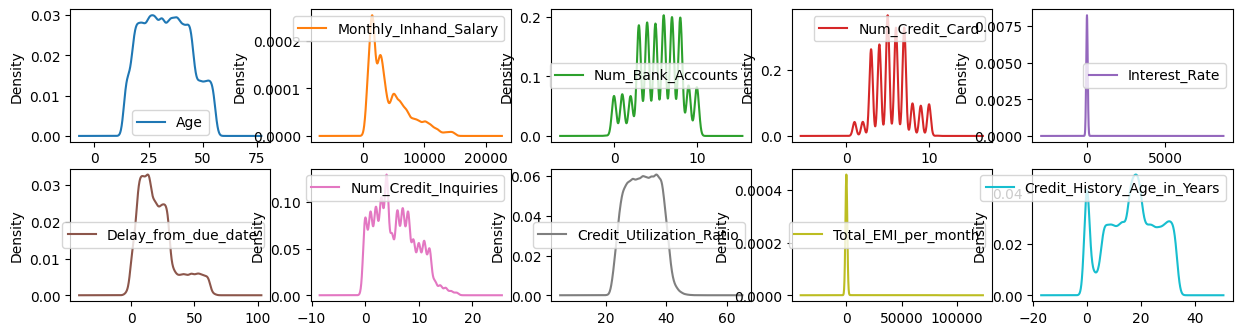

In [30]:
plt.rcParams['figure.figsize'] = [15,10]
df.plot(kind='density',subplots=True,layout=(5,5),sharex=False)
plt.show()

### No. of Bank Accounts

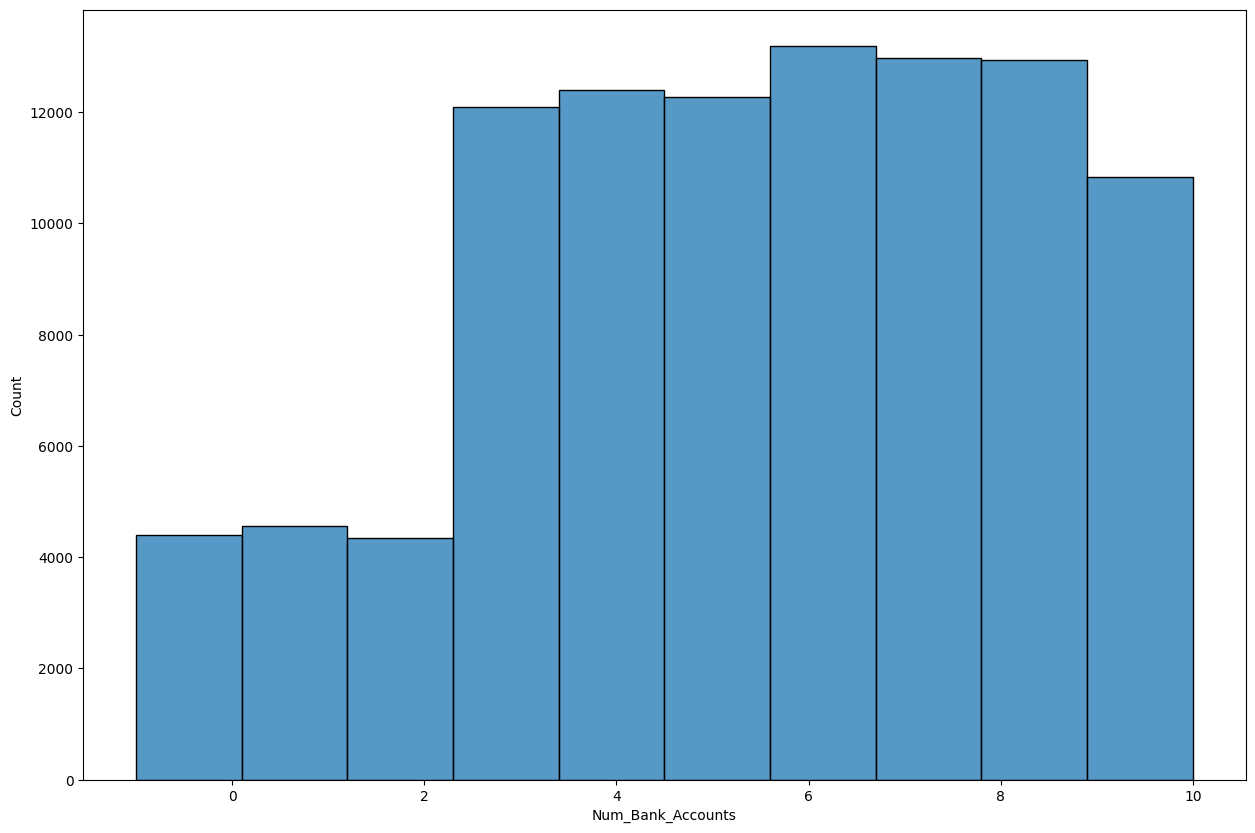

In [114]:
sns.histplot(data=df, x = 'Num_Bank_Accounts',bins=10)
plt.show()

### No. Of Credit Cards

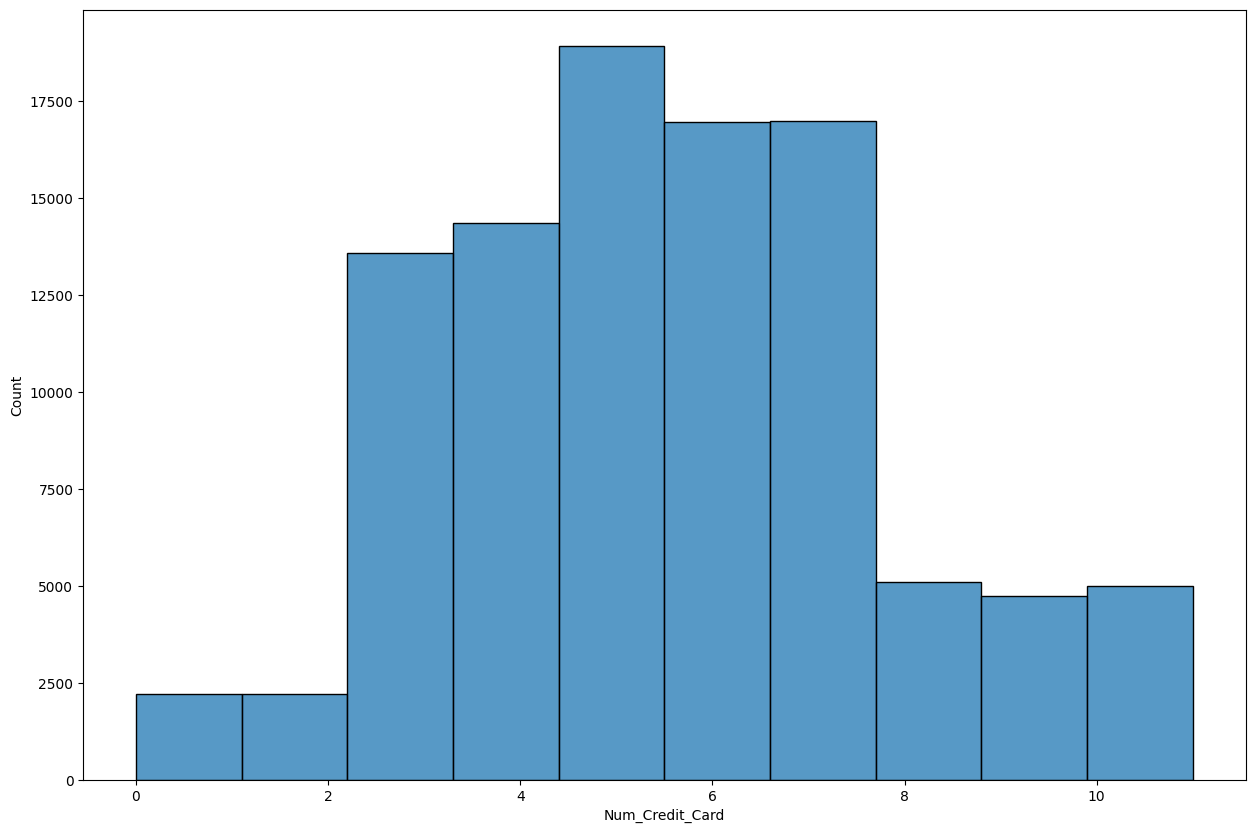

In [115]:
sns.histplot(data=df, x = 'Num_Credit_Card',bins=10)
plt.show()

##Label encoding Features

In [148]:
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace({"Yes": 1, "No": 0, "NM": 0})

In [149]:
df["Credit_Mix"] = df["Credit_Mix"].replace({"Standard": 1, "Good": 2, "Bad": 0})

The categories seem to have an implicit hierarchy based on spent value and payment size, thus we can assign numerical values accordingly.

1. Low_spent_Small_value_payments: 1
2. High_spent_Small_value_payments: 2
3. Low_spent_Medium_value_payments: 3
4. High_spent_Medium_value_payments: 4
5. Low_spent_Large_value_payments: 5
6. High_spent_Large_value_payments: 6

This numeric representation captures the hierarchy where higher numbers represent higher spent value or larger payments.

In [145]:
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace({
      "Low_spent_Small_value_payments": 1,
      "High_spent_Medium_value_payments": 2,
      "Low_spent_Medium_value_payments": 3,
      "High_spent_Large_value_payments": 4,
      "High_spent_Small_value_payments": 5,
      "Low_spent_Large_value_payments": 6
  })

## Feature engineering

In [150]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(int)

In [151]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

In [152]:
# Calculating Debt to Income ratio
df['Monthly_Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Monthly_Inhand_Salary']

In [153]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

df['loan_vs_income_ratio'] = df['Num_of_Loan'] / df['Annual_Income']
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']
df['Total_EMI_per_month'] = pd.to_numeric(df['Total_EMI_per_month'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Total_Monthly_Payments'] = df['Total_EMI_per_month'] + (df['Monthly_Balance'] * df['Interest_Rate'])
df['Avg_Monthly_Balance'] = df['Monthly_Balance'] / 12
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['saving_ratio'] = df['Amount_invested_monthly'] / df['Annual_Income']
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Total_Payments'] = df['Num_of_Loan'] + df['Num_Bank_Accounts'] + df['Num_Credit_Card']
df['Payment_History'] = 1 - (df['Num_of_Delayed_Payment'] / df['Total_Payments'])

In [154]:
# This feature represents the capacity of a person to repay debts on a monthly basis.
# It's calculated as the difference between Monthly Inhand Salary and Monthly EMI Payments.

df['Monthly_Debt_Repayment_Capacity'] = df['Monthly_Inhand_Salary'] - df['Total_EMI_per_month']

### Payment history score

Combines features like Delay_from_due_date, Num_of_Delayed_Payment, and Payment_of_Min_Amount into a single score using a scoring function (e.g., penalty points for each late payment).

In [155]:
df["Payment_History_Score"] = (
      -1 * df["Delay_from_due_date"]
      -1 * df["Num_of_Delayed_Payment"]
      + 1 * df["Payment_of_Min_Amount"]
  )

## Credit score calculation

Selected features for credit score calulcation with their weights:
1. Payment histoRy score
  - Weight: 0.40
  - Strongest predictor of future credit behavior.
2. Credit History Age in Months
  - Weight: 0.20
  - Longer credit history indicates responsible credit usage.Weighted moderately to reflect its significance.
3. Monthly Debt-to-Income Ratio (MDTIR)
  - Weight: 0.15
  - Lower ratio indicates better ability to manage debt.Weighted lower due to potential fluctuations in income.
4. Credit Utilization Ratio
  - Weight: 0.10
  - Lower ratio suggests responsible credit card usage.Weighted lower as it's a snapshot of current utilization.
5. Monthly Debt Repayment Capacity
  - Weight: 0.05
  - Reflects ability to manage existing debt.
6. Outstanding Debt
  - Weight: 0.05
  - Higher debt increases risk of default.
7. Num_Credit_Inquiries
  - Weight: 0.03
  - Fewer inquiries suggest lower credit-seeking behavior.
8. Payment Behaviour
  - Weight: 0.02
  - Insights into spending patterns and payment tendencies.

In [124]:
df['Payment_Behaviour']

,Payment_Behaviour
0,High_spent_Small_value_payments
1,Low_spent_Large_value_payments
2,Low_spent_Medium_value_payments
3,Low_spent_Small_value_payments
4,High_spent_Medium_value_payments
...,...
99995,High_spent_Large_value_payments
99996,High_spent_Medium_value_payments
99997,High_spent_Large_value_payments
99998,Low_spent_Large_value_payments


In [159]:
def calculate_credit_score(data):

  # Group by Customer ID, handling month-level data and calculating scores
  grouped_data = data.groupby("Customer_ID").agg(
      Payment_History_Score=("Payment_History_Score", "mean"),
      Credit_History_In_Months=("Credit_History_In_Months", "max"),  # Use maximum history age
      Monthly_Debt_to_Income_Ratio=("Monthly_Debt_to_Income_Ratio", "mean"),
      Credit_Utilization_Ratio=("Credit_Utilization_Ratio", "mean"),
      Monthly_Debt_Repayment_Capacity=("Monthly_Debt_Repayment_Capacity",'mean'),
      Outstanding_Debt=("Outstanding_Debt", "mean"),
      Num_Credit_Inquiries=("Num_Credit_Inquiries", "sum"),
      Payment_Behaviour=("Payment_Behaviour","mean"), # Use average payment behaviour encoding
  )

  # Standardize values for numerical features
  grouped_data = (grouped_data - grouped_data.mean()) / grouped_data.std()

  # Calculate weighted scores
  grouped_data["credit_score"] = (
      0.40 * grouped_data["Payment_History_Score"]
      + 0.20 * grouped_data["Credit_History_In_Months"]
      + 0.15 * (1-grouped_data["Monthly_Debt_to_Income_Ratio"]) #Inverse relation as lower the value better the financials
      + 0.10 * (1-grouped_data["Credit_Utilization_Ratio"]) #inverse relation
      + 0.05 * grouped_data["Monthly_Debt_Repayment_Capacity"]
      + 0.05 * grouped_data["Outstanding_Debt"]
      + 0.03 * (1-grouped_data["Num_Credit_Inquiries"]) #Inverse relation
      + 0.02 * grouped_data["Payment_Behaviour"]
  )

  # Normalize scores to a range of 0 to 100
  grouped_data["credit_score"] = (grouped_data["credit_score"] - grouped_data["credit_score"].min()) / (grouped_data["credit_score"].max() - grouped_data["credit_score"].min()) * 100

  return grouped_data.reset_index()


# Calculate scores for all customers
credit_scores_df = calculate_credit_score(df)
credit_scores_df[["Customer_ID","credit_score"]]

,Customer_ID,credit_score
0,CUS_0x1000,79.507346
1,CUS_0x1009,78.732755
2,CUS_0x100b,88.847326
3,CUS_0x1011,90.514655
4,CUS_0x1013,89.588232
...,...,...
12495,CUS_0xff3,86.372336
12496,CUS_0xff4,88.235323
12497,CUS_0xff6,93.948279
12498,CUS_0xffc,82.148626


## Insights

1. We have record of 12500 unique customers
2. In the dataset, we have data for each customer over the course of 8 months(from January to August)
3. We have following types of loans
  - auto loan
  - credit-builder loan
  - debt consolidation loan
  - home equity loan
  - mortgage loan
  - not specified
  - payday loan
  - personal loan
  - student loan
4. Most customers have a low Annual income and Distribution is right skewed.
5. Most customers have a low monthly income. Distribution is right skewed.
6. Majority of customers has no. of bank accounts between 3 to 8.
7. Number of credit cards range from 0 to 11 with most of the customers having credit cards in the range of 3 to 7 with peak at 5.
8. Interest rate ranges from 1% to 34%
9. Delay from due date is concentrated between 0 to 30 days.
10. Very few customers invest greater than 2k amount per month
11. Customers typically take anywhere from 2 to 4 loans, with the maximum number being 9.

For credit score calculation we have used following features with their respective weights
- Selected features for credit score calulcation with their weights:
1. Payment histroy score: (Weight: 0.40)
2. Credit History Age in Months (Weight: 0.20)
3. Monthly Debt-to-Income Ratio (MDTIR) (Weight: 0.15)
4. Credit Utilization Ratio (Weight: 0.10)
5. Monthly Debt Repayment Capacity (Weight: 0.05)
6. Outstanding Debt (Weight: 0.05)
7. Num_Credit_Inquiries (Weight: 0.03)
8. Payment Behaviour (Weight: 0.02)

**Recommendation:**
- This is a very simple model that we have used for credit score calculation but to improve the reliabality of this score.
- We can explore with different weighting schemes, or try diffrent features.
- we should also explore other methods preferably ML based solutions that you can exploxe once you study different ML algorithms.